In [1]:
!wget -P /content/data http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget -P /content/data http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget -P /content/data http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget -P /content/data http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
!pip install idx2numpy

--2022-10-22 11:39:53--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘/content/data/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.04s   

2022-10-22 11:39:54 (265 MB/s) - ‘/content/data/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2022-10-22 11:39:54--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘/content/data/train-labels-idx1-ubyt

In [2]:
import gzip
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import idx2numpy
import cv2
from google.colab.patches import cv2_imshow

In [3]:
f1 = gzip.open('/content/data/train-images-idx3-ubyte.gz')
f2 = gzip.open('/content/data/train-labels-idx1-ubyte.gz')
f3 = gzip.open('/content/data/t10k-images-idx3-ubyte.gz')
f4 = gzip.open('/content/data/t10k-labels-idx1-ubyte.gz')
data1 = idx2numpy.convert_from_file(f1)
label = idx2numpy.convert_from_file(f2)
img = data1.reshape(data1.shape[0], -1).T/255
lab = np.eye(10)[label]
lab = lab.T

In [4]:
W = np.random.randn(784,10)*0.001
b = 0

def softmax(x):
  expo = np.exp(x - x.max())
  expo = expo/np.sum(expo, keepdims = True, axis = 0)
  return expo

def d_softmax(x):
    exp_element = np.exp(x - x.max())
    exp_element = exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))
    return exp_element


cost = 0
cost_func = []
accuracy = []

In [5]:
alpha = 0.5

In [6]:
for i in range(0,300):
  #Forward Prop
  Z = np.dot(W.T, img) + b
  A = softmax(Z)

  #Getting Output
  out = A.reshape(10,60000)
  guess = np.argmax(out, axis = 0)

  #Printing Output
  if i%10 == 0:
    print(label)
    print(guess)

  #Loss and Cost
  loss = -np.sum(lab*np.log(A + 0.000001) + (1-lab)*np.log(1-A + 0.000001), keepdims = True, axis = 0)
  cost = np.sum(loss, keepdims = True, axis = 1)/60000
  cost = float(np.squeeze(cost))
  cost_func.append(cost)
  if i%10==0:
    print(cost)

  #Getting Accuracy
  OH_out = (np.eye(10)[guess]).T
  acc = np.multiply(OH_out, lab)
  acc = np.sum(acc)/600
  accuracy.append(acc)

  if i%10 == 0:
    print(acc)

  #Backward Prop
  dZ = A - lab
  dW = np.dot(img, dZ.T)/60000
  db = np.sum(dZ, keepdims=True, axis=1)/60000
  W = W - alpha*dW
  b = b - alpha*db

[5 0 4 ... 5 6 8]
[7 7 0 ... 0 5 0]
3.253733449295833
4.298333333333333
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
1.2887874504911447
83.93833333333333
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
1.0066578935118522
86.13333333333334
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.8872928463403681
87.08
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.8182100985413365
87.72666666666667
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.7720131300203346
88.19333333333333
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.7383939064907808
88.55
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.7125299213130432
88.84666666666666
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.6918350540761327
89.07166666666667
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.6747853450232488
89.28833333333333
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.6604183376331014
89.46666666666667
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.6480930084322246
89.60333333333334
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.6373640405502722
89.74666666666667
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.6279112896176006
89.84666666666666
[5 

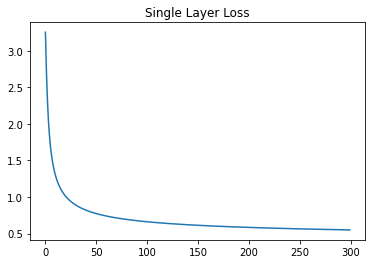

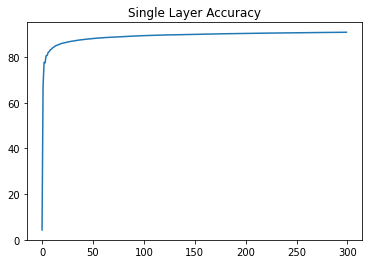

In [7]:
plt.plot(cost_func)
plt.title("Single Layer Loss")
plt.show()
plt.plot(accuracy)
plt.title("Single Layer Accuracy")
plt.show()